In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st
import os

In [2]:
df = pd.read_csv('datasets/games.csv')

In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


<h2>Предобработка данных

In [4]:
# Так наглядней чем df.columns
for column in df.columns:
    print(column)

Name
Platform
Year_of_Release
Genre
NA_sales
EU_sales
JP_sales
Other_sales
Critic_Score
User_Score
Rating


In [5]:
df.columns = df.columns.map(lambda x: x.lower())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df['year_of_release'].isna().sum()

269

Изучим записи, которые содержат пропуски в поле `year_of_release`. Таких записей 269, что от общего числа:

In [9]:
df['year_of_release'].isna().sum() / len(df)

0.01609332934489979

Чуть больше процента. Впринципе, таким колличеством мрожно и принебречь. Но, всё таки взглянем на них:

In [10]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df[df['year_of_release'].isna()]['genre'].value_counts().sort_values(ascending=False)

Action          62
Sports          42
Misc            29
Shooter         27
Racing          23
Role-Playing    17
Simulation      16
Fighting        12
Puzzle          11
Adventure       10
Platform        10
Strategy        10
Name: genre, dtype: int64

Можно заметить, что большенство из таких игр – это спортивные симуляторы (221 например –  это футбол). И они содержат год в названии

In [12]:
df[(~df['year_of_release'].isna()) & (df['name'].str.contains('Soccer'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E
190,FIFA Soccer 13,X360,2012.0,Action,1.09,3.47,0.03,0.57,90.0,6.1,E
202,FIFA Soccer 11,PS3,2010.0,Sports,0.61,3.28,0.06,1.12,89.0,8,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
274,FIFA Soccer 06,PS2,2005.0,Sports,0.78,2.55,0.04,0.84,80.0,7.8,E
...,...,...,...,...,...,...,...,...,...,...,...
16033,FIFA Soccer 08,PC,2007.0,Sports,0.00,0.01,0.00,0.00,77.0,6.1,E
16060,Worldwide Soccer Manager 2006,PC,2004.0,Sports,0.00,0.01,0.00,0.00,89.0,NaN,E
16176,Fab 5 Soccer,DS,2008.0,Sports,0.01,0.00,0.00,0.00,NaN,tbd,E
16528,Pro Evolution Soccer 2010,PC,2009.0,Sports,0.00,0.01,0.00,0.00,78.0,6.9,E


Причём, нельзя просто так взять эту цифру и заполнить ей пропушенные значения, потому что:
<ol>
    <li>Где-то в названии игры год указан четырех значным числом (2011), а где-то двух значным (11)
    <li>В большенстве названий указан следующий год после выхода игры
    <li>Где-то год указан в скобках
<ol><br>
Всё это надо учесть

In [13]:
df.loc[(~df['year_of_release'].isna()) & (df['name'].str.contains('20'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,NaN,tbd,E
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


В первую очередь обработаем записи, где год указан четырехзначным числом.<br>
Посмотрим на них:

In [14]:
df[
        (df['year_of_release'].isna())
        &
        (df['name'].str.contains('20'))
    ]['name']\
        .str.split(' ')

183                          [Madden, NFL, 2004]
377                         [FIFA, Soccer, 2004]
475             [wwe, Smackdown, vs., Raw, 2006]
1650                     [NASCAR, Thunder, 2003]
2492                      [MLB, SlugFest, 20-03]
2572        [PES, 2009:, Pro, Evolution, Soccer]
3486                         [Madden, NFL, 2002]
4775                        [NFL, GameDay, 2003]
5156                           [NBA, Live, 2003]
5336                      [Tomb, Raider, (2013)]
5655                  [All-Star, Baseball, 2005]
5889                           [NBA, Live, 2003]
6954                                  [Jet, X20]
8918                  [All-Star, Baseball, 2005]
13195                   [Tour, de, France, 2011]
13929                        [Sega, Rally, 2006]
15953    [PDC, World, Championship, Darts, 2008]
16079                  [Football, Manager, 2007]
16373    [PDC, World, Championship, Darts, 2008]
Name: name, dtype: object

Вручную обработаем совсем уж выбивающиеся значения (их всего два):

In [15]:
df.loc[(df['year_of_release'].isna())  & (df['name'] == 'PES 2009: Pro Evolution Soccer'), 'year_of_release'] = 2009
df.loc[(df['year_of_release'].isna())  & (df['name'] == 'Jet X20'), 'year_of_release'] = 0 # Год всё равно неизвестен

Остальное обработаем автоматически

In [16]:
df.loc[(df['year_of_release'].isna())  & (df['name'].str.contains('20')), 'year_of_release'] = \
df[(df['year_of_release'].isna()) & (df['name'].str.contains('20'))]['name'].str.split(' ').map(lambda x: int(x[-1] \
                                                                     .replace('-', '') \
                                                                     .replace('(', '') \
                                                                     .replace(')', ''))-1)

Теперь обработаем записи, где год указан двухзначным числом

In [17]:
# df.loc[df['year_of_release'].isna(), 'year_of_release'] = \
df.loc[(df['year_of_release'].isna())]['name'].str.split(' ').map(lambda x: '20'+str(int(x[-1])-1 )if len(x[-1])==2 and x[-1].isdigit() else 0)

456      0
609      0
627      0
657      0
678      0
        ..
16348    0
16405    0
16448    0
16458    0
16522    0
Name: name, Length: 250, dtype: object

In [18]:
df[df['name'] == 'PES 2009: Pro Evolution Soccer' ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
617,PES 2009: Pro Evolution Soccer,PS2,2008.0,Sports,0.13,0.07,0.26,2.05,NaN,NaN,NaN
783,PES 2009: Pro Evolution Soccer,PS3,2008.0,Sports,0.11,1.33,0.40,0.26,NaN,NaN,NaN
2068,PES 2009: Pro Evolution Soccer,X360,2008.0,Sports,0.13,0.76,0.03,0.09,NaN,NaN,NaN
2572,PES 2009: Pro Evolution Soccer,PSP,2009.0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
4329,PES 2009: Pro Evolution Soccer,Wii,2009.0,Sports,0.09,0.26,0.05,0.05,NaN,NaN,NaN


Т.к. на данном этапе без детального исследования не понятно, можно ли данные с пропусками удалить и какая причина пропуска или закономерность.<br>
заменим пропуски года релиза игры на 0. А потом при необходимости заменим это значение или удалим строки с этим значением<br>

In [19]:
df['year_of_release'].fillna(0, inplace=True)
# Преведём данные следующих столбцов к формату int
df['year_of_release'] = df['year_of_release'].astype('int')

In [20]:
len(df[df['user_score'] == 'tbd'])

2424

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Заменим такие значения на привычное нам `NaN`

In [21]:
df['user_score'] = df['user_score'].map(lambda  x: x.replace('tbd', 'NaN') if x=='tbd' else x)
df['user_score'] = df['user_score'].astype('float')

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

<h2>Исследовательский анализ данных

<h3> Изучим, сколько игр выпускалось в разные года:

<AxesSubplot: xlabel='year_of_release'>

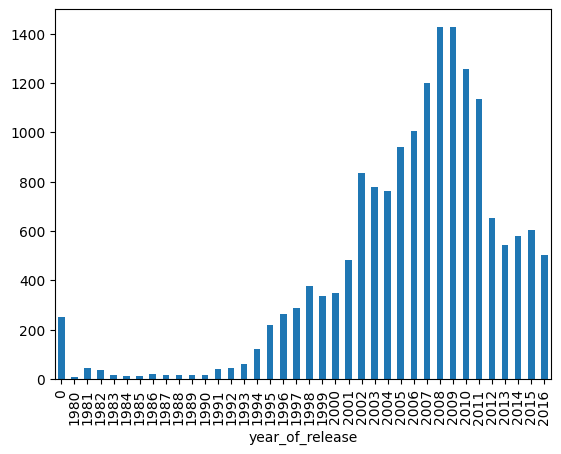

In [23]:
df.groupby('year_of_release')['name'].count().plot.bar()

<strong>Вывод:</strong><br>
Количество релизов видеоигр постепенно увеличивалось с 1991 года и пришелся на 2008-2009. Далее резкое падение и к 2016 рынок стабилизировался.

<h3>Изучим, как менялись продажи по платформам:

Выбереме платформы с максимальными суммарными продажами:

In [24]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
GB       247.26
NES      245.74
3DS      245.64
PC       237.14
N64      214.30
SNES     196.82
GC       193.75
XOne     145.05
2600      96.07
WiiU      76.24
PSV       47.61
SAT       33.52
GEN       29.80
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

<AxesSubplot: xlabel='year_of_release'>

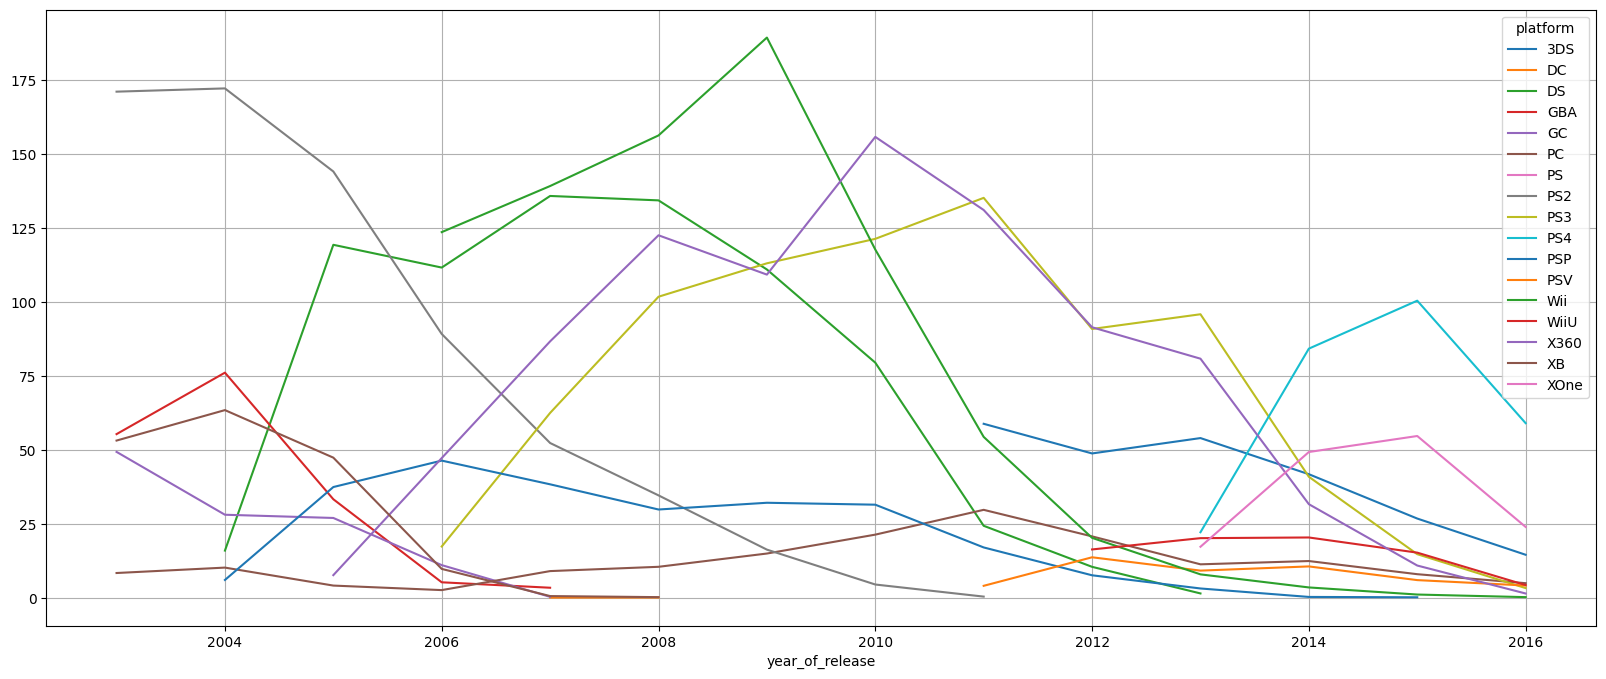

In [25]:
df[df['year_of_release'] > 2002].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,8), grid=True)

График получился не очень читабельным. Консоли одной макри сменяют друг друга поколение за поколением, продажи прошлых поколений плавно падают. Новых взлетают и т.д. В принципе, это полезная информация, Но попробуем объединить их и посмотреть "в общем":

In [26]:
df['platform_general'] = df['platform']
df['platform_general'] = df['platform_general'].map(lambda x: 'PS'   if 'PS' in x else x)
df['platform_general'] = df['platform_general'].map(lambda x: 'XBox' if 'X'  in x else x)
df['platform_general'] = df['platform_general'].map(lambda x: 'DS'   if 'DS' in x else x)

<AxesSubplot: xlabel='year_of_release'>

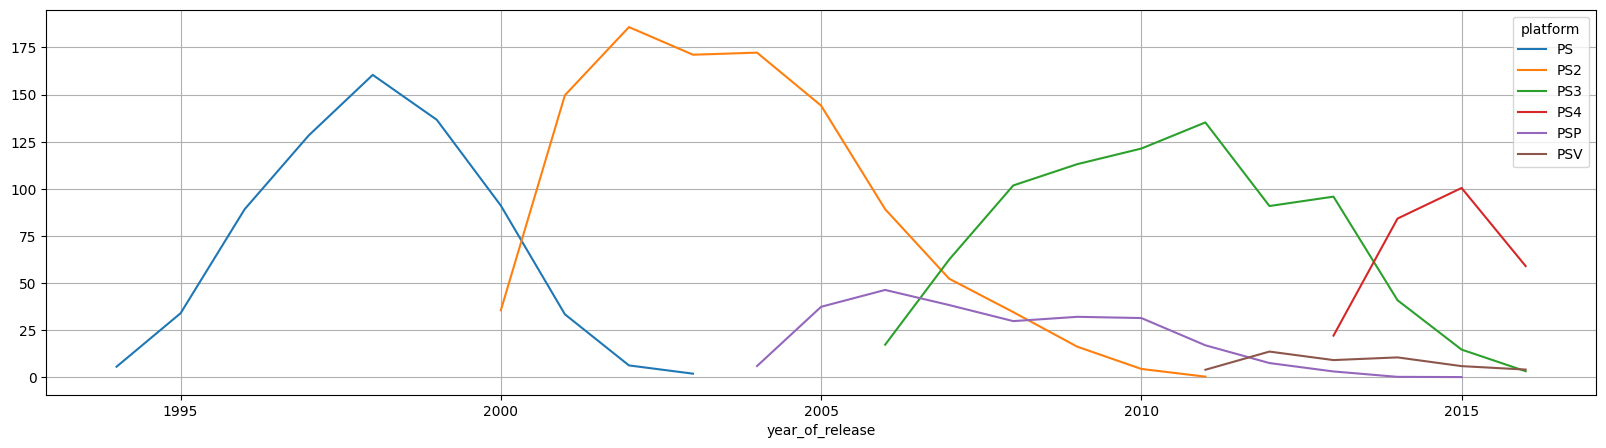

In [27]:
df[(df['platform_general'] == 'PS') & (df['year_of_release'] > 0)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,5), grid=True)

<AxesSubplot: xlabel='year_of_release'>

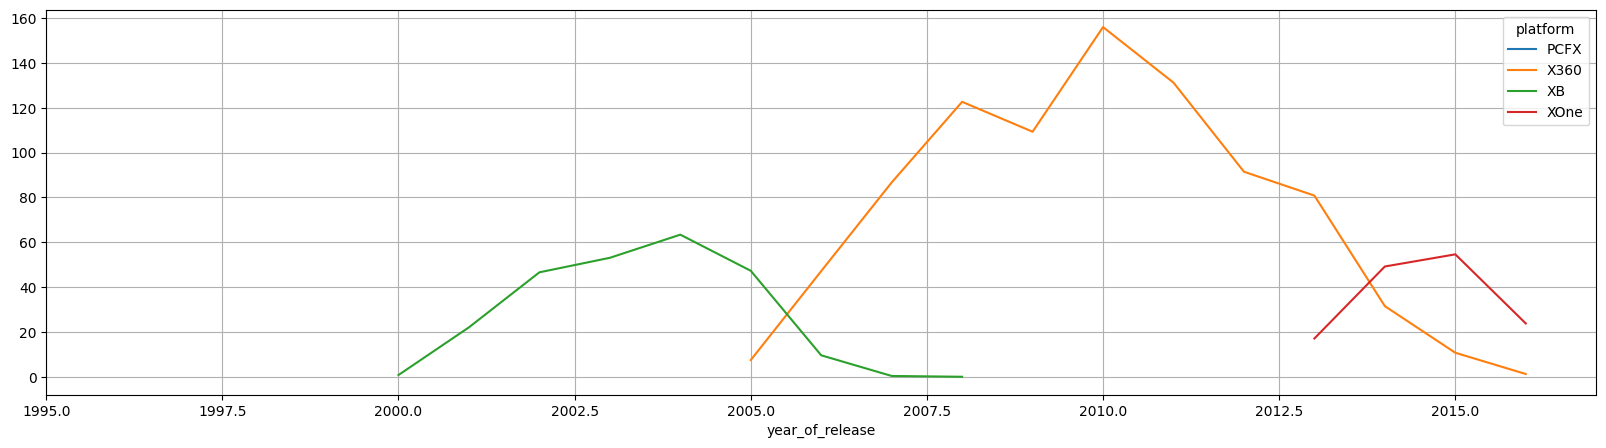

In [28]:
df[(df['platform_general'] == 'XBox') & (df['year_of_release'] > 0)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,5), grid=True)

<AxesSubplot: xlabel='year_of_release'>

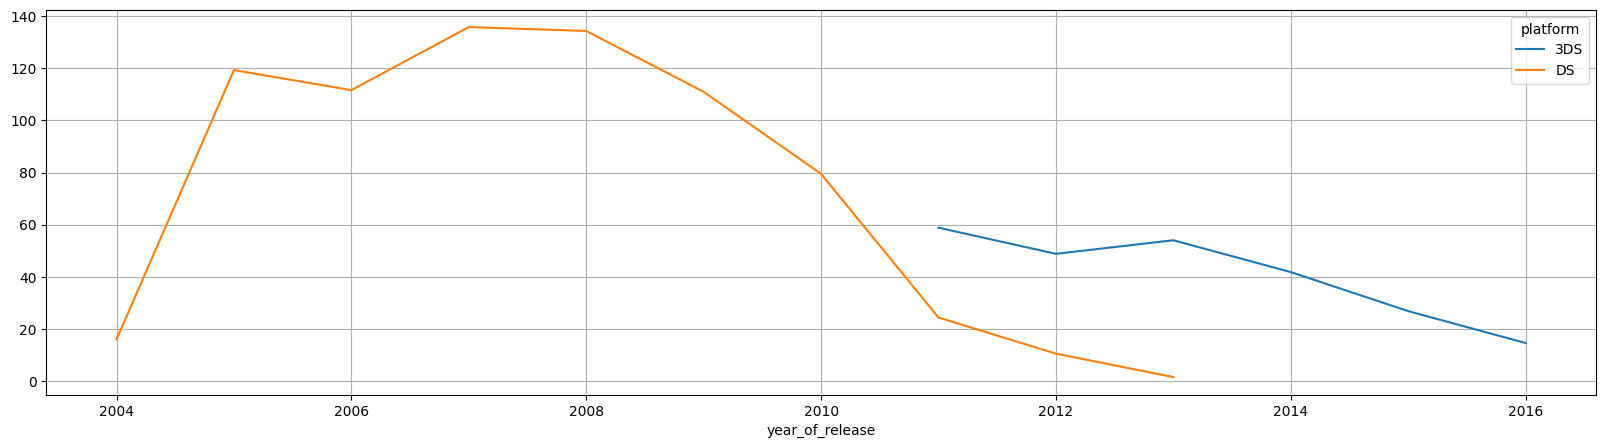

In [29]:
df[(df['platform_general'] == 'DS') & (df['year_of_release'] > 2000)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,5), grid=True)

Поколения платформ меняются каждые 5 лет, но продажи игр могу растянуться на 10 лет, хотя период высоких продаж также будет приходить на пятилетние периоды.<br>
Но для определения фактора, влияющего на продажи, все-таки, возьмём период в 10 лет:

In [30]:
df2 = df[df['year_of_release'] >= df['year_of_release'].max()  - 10]

<AxesSubplot: xlabel='year_of_release'>

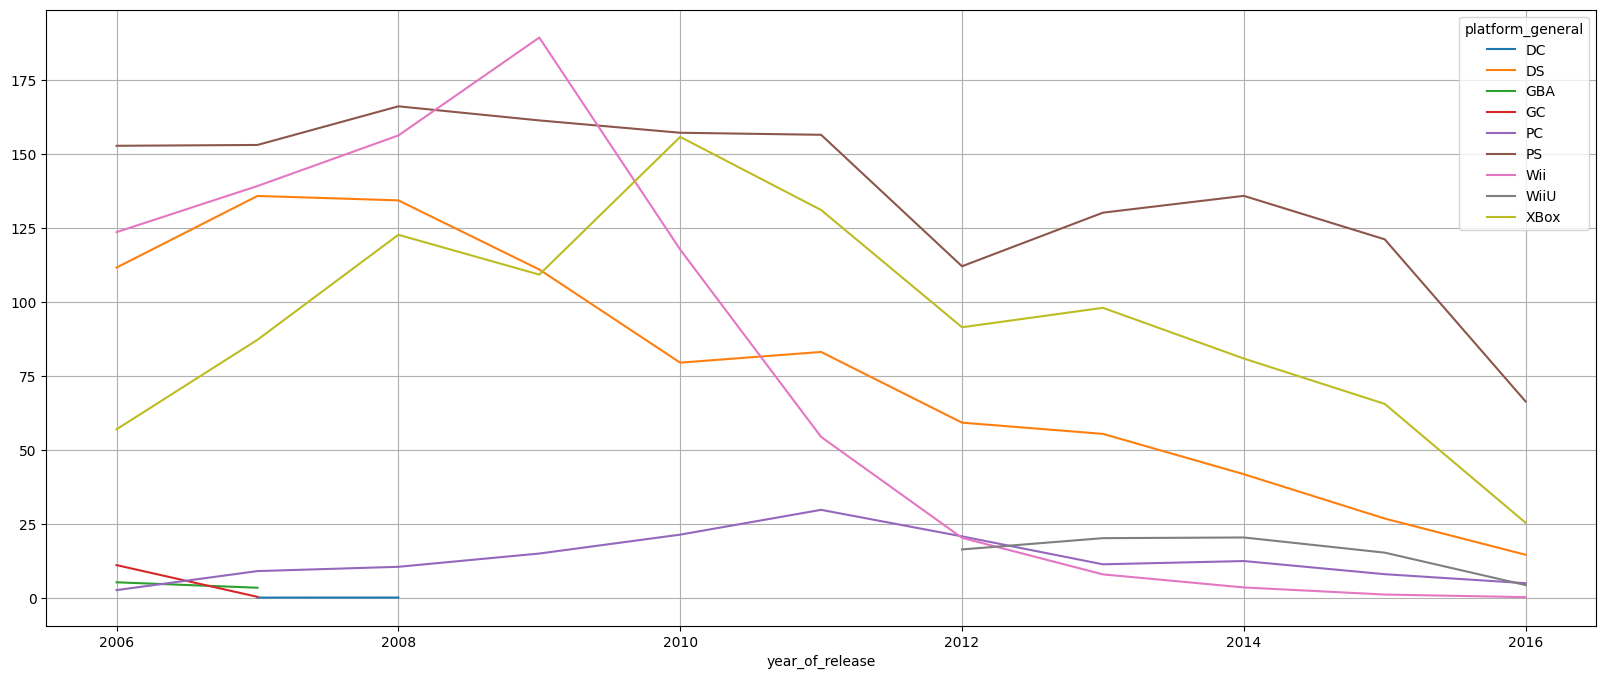

In [31]:
df2.pivot_table(index='year_of_release', columns='platform_general', values='total_sales', aggfunc=sum).plot.line(figsize=(20,8), grid=True)

Наблюдается падение рынка в целом после 2010 года. Но продажи PlayStation, XBox и Nintendo DS. Но т.к. мы смотри продажи по объединённым, маркам изучи эти платформы подробнее

<AxesSubplot: xlabel='year_of_release'>

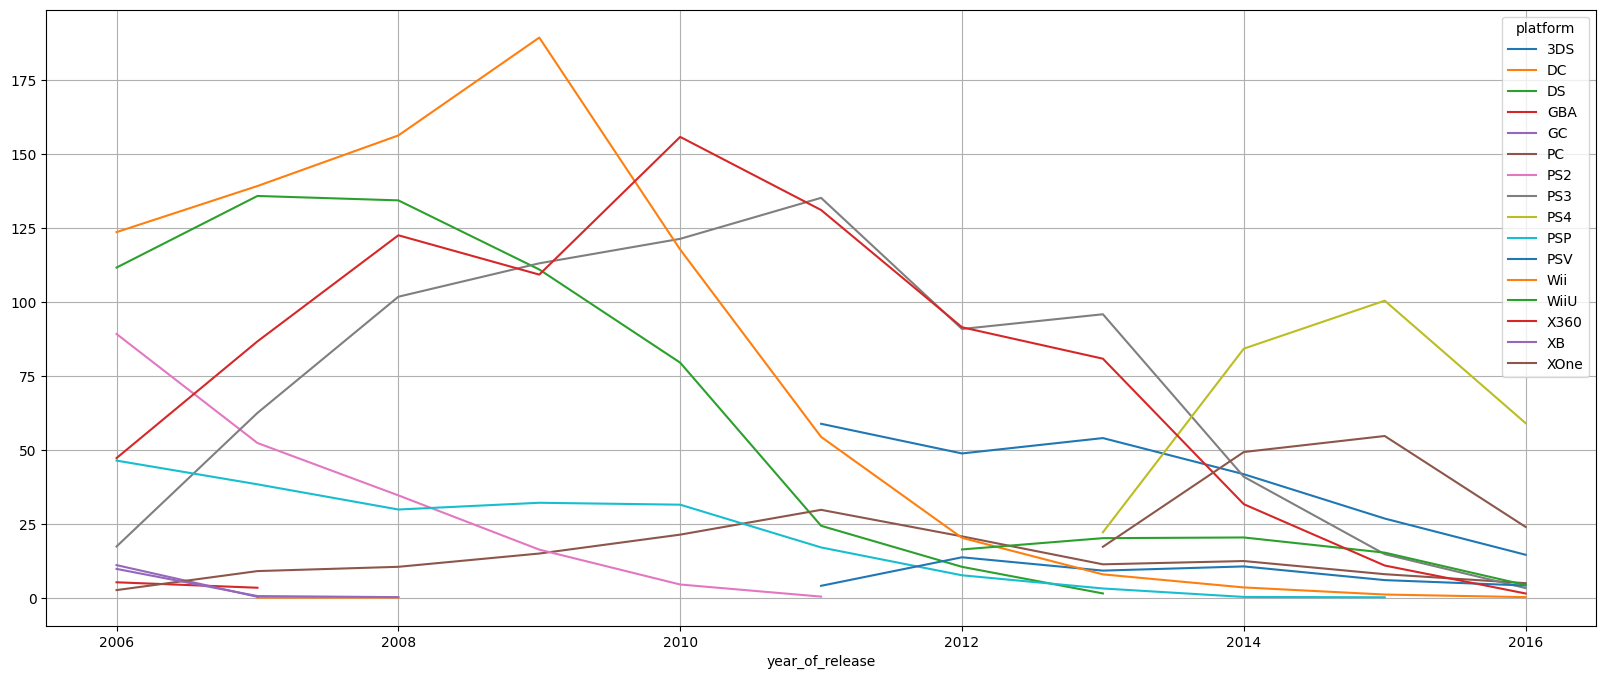

In [32]:
df2.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).plot.line(figsize=(20,8), grid=True)

И так, интересн для нас будут представлять следующие платформы:<br>
<ol>
    <li><b>PS4</b> и <b>XBox One</b>
    <li>Так же можно рассмотреть <b>3DS</b>. С ондной стороны, эта платформа демонстрирует стабильное падение продаж на протежении последних пяти лет, но подение это сильно линейно, значит объём продаж будет легко прогнозируем и не сложно будет закупить именно столько игр, сколько мыц точно сможем продать и как следствие заработать – пусть и не так много, но в целомм, на данный момент продажи игр этой платформы идут на третьем месте
</ol>

<AxesSubplot: >

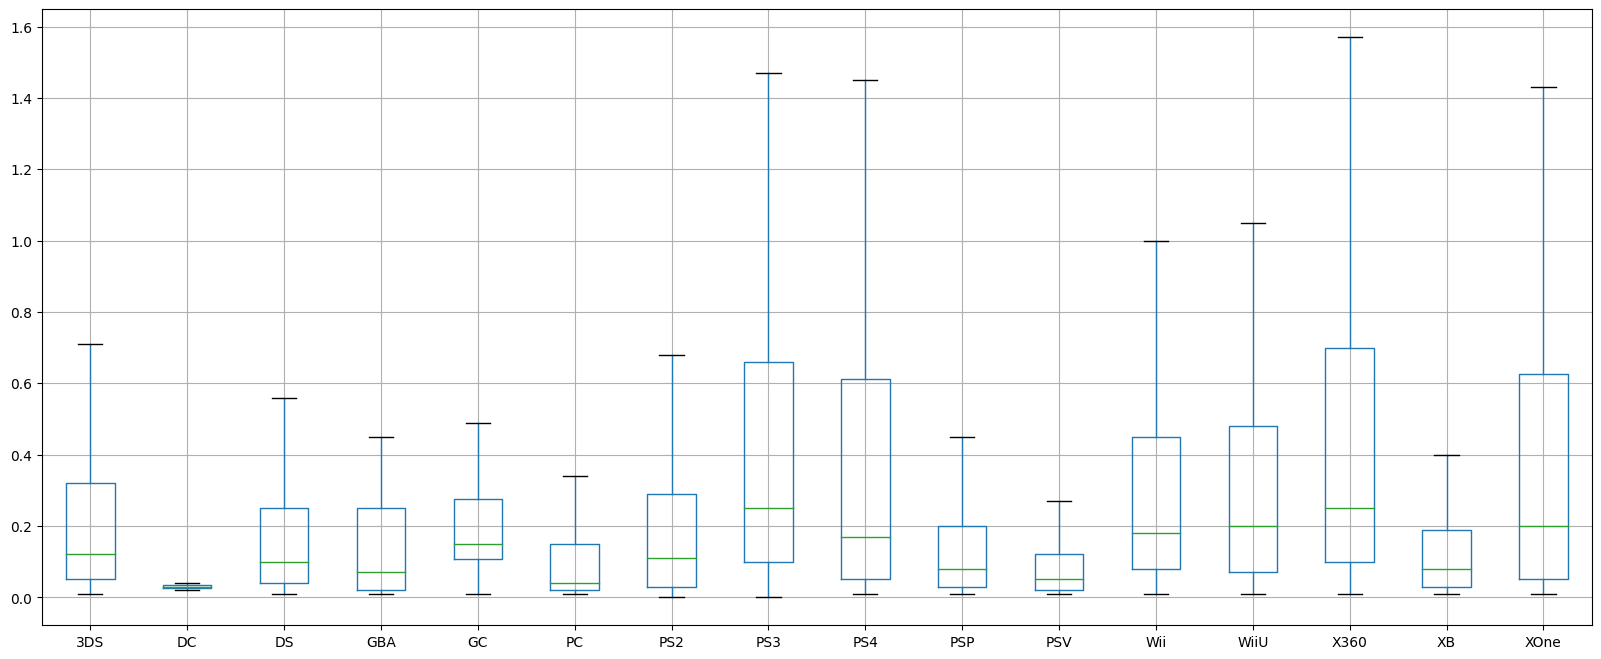

In [33]:
df2.pivot_table(index='name', columns='platform', values='total_sales', aggfunc=sum).boxplot(figsize=(20,8), showfliers = False)

Платформы с относительно высокой медианой продаж это также: PS, XBox, Wii.<br>
У этих же платфор и больший разброс продаж игр, что обуславливается просто большим количество игр, выпущенных для этих платформ (см. следующую ячейку).<br>
Но есть и приятный момент – игр, чьи суммы продаж выше медианной у этих платформ больше.

In [34]:
df.groupby('platform')['name'].count().sort_values(ascending=False).head(7)

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
Name: name, dtype: int64

Посмотрим, как влияют на продажи внутри одной популярной платформы (PlayStation, включая PSP и PS Vita) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сделаем вывод:

In [35]:
df_ps = df2[df2['platform_general'] == 'PS']

Для начала, посмотрим насколько расходятся вкусы профессиональных критиков и обычных поль

<AxesSubplot: xlabel='critic_score', ylabel='user_score'>

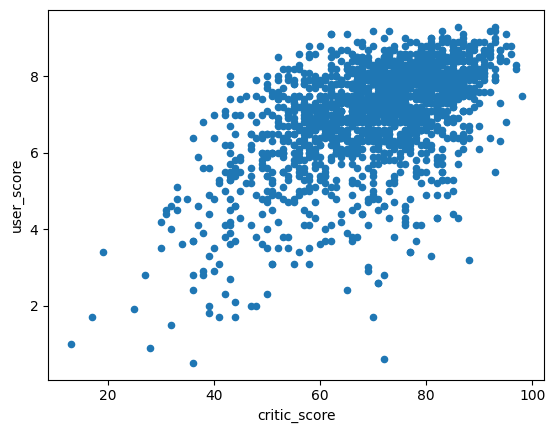

In [36]:
df_ps.plot.scatter(x='critic_score', y='user_score')

Ничего интересного. Посмотрим на числовую характеристику корреляции:

In [37]:
df_ps['critic_score'].corr(df_ps['user_score'])

0.5489223230787996

Корреляция средняя, т.е. мнения критиков и игроков часто расходяться<br>
Проверим, к кому же мы чаще прислушиваемся при покупке игры. Оценим влияния и тех и других на продажи<br>
Влияние критиков:

<AxesSubplot: xlabel='user_score', ylabel='total_sales'>

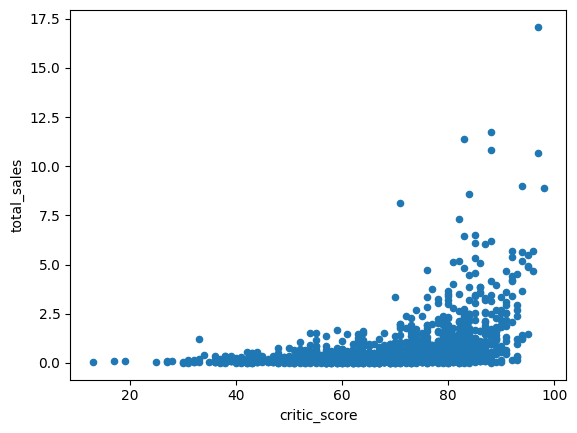

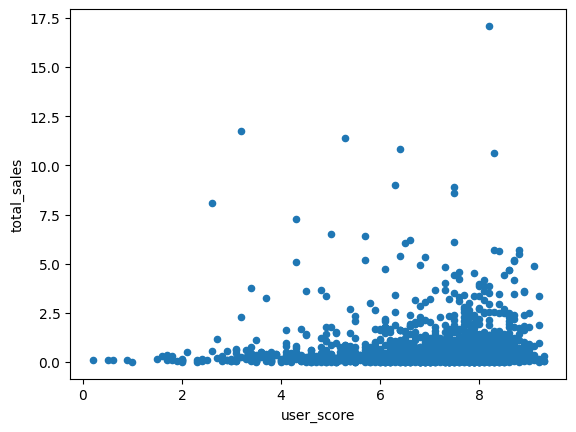

In [38]:
df_ps.plot.scatter(x='critic_score', y='total_sales')
df_ps.plot.scatter(x='user_score', y='total_sales')

Судя графикам, у игр, плохо оцененными игроками всё же встречаются хорошие продажи, а вот у игр с низкой оценкой критиков таких продаж не встречается.<br>
Для онокнчательного вывода, посмотрим так же на численные оценик корреляций

In [39]:
print('Влияние критиков на продажи', df_ps['critic_score'].corr(df_ps['total_sales']))
print('Влияние игроков на продажи', df_ps['user_score'].corr(df_ps['total_sales']))

Влияние критиков на продажи 0.40279018499316277
Влияние игроков на продажи 0.06899118006073247


<strong>Вывод:</strong><br>
Влияние игроков ниже. Значит для подбора ассортимена для магазина игр стоит прислушиваться к мнению профессиональных критиков.
Но посмотрим нак же на подобные корреляции платформ XBox и DS:

XBox :
Критики 0.3806984488381476
Игроки 0.09222800941018948
DS :
Критики 0.2657225292077062
Игроки 0.14898856987009937


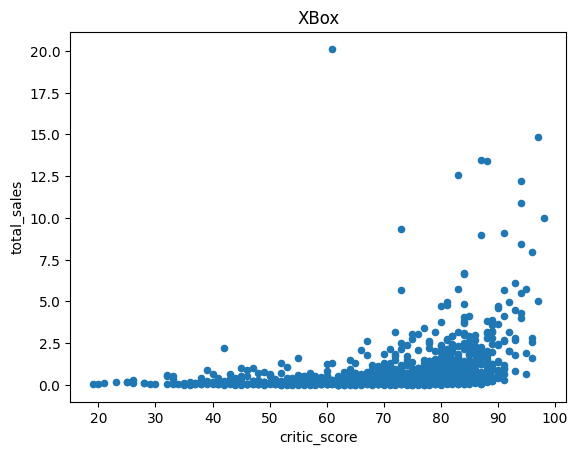

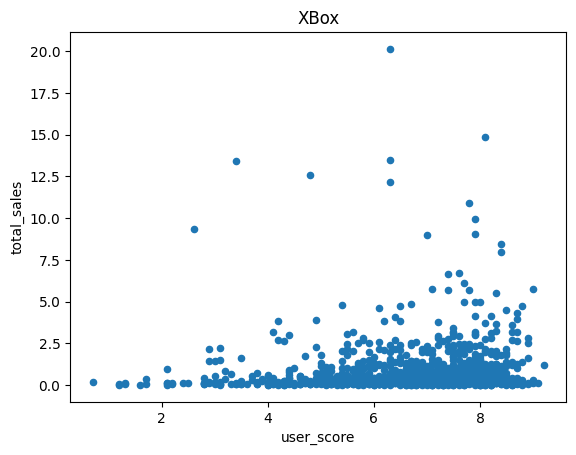

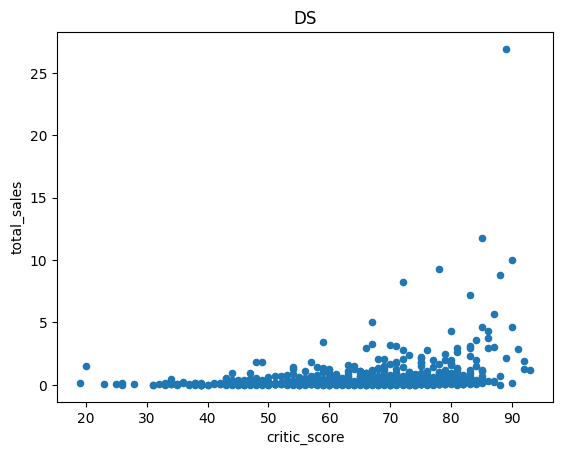

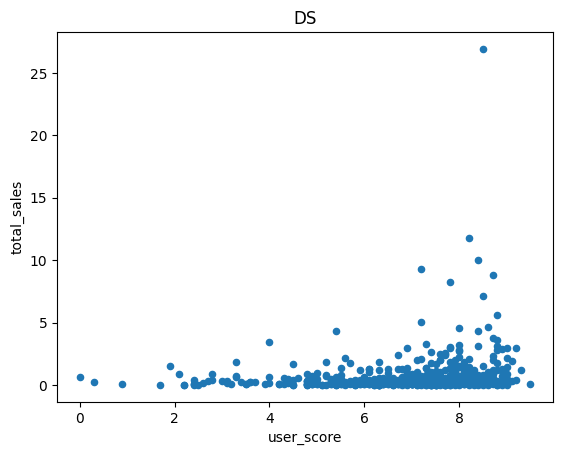

In [40]:
for platform in ['XBox', 'DS']:
    df2[df2['platform_general'] == platform].plot.scatter(x='critic_score', y='total_sales', title=platform)
    df2[df2['platform_general'] == platform].plot.scatter(x='user_score', y='total_sales', title=platform)

    print(platform, ':')
    print(f'Критики', df2[df2['platform_general'] == platform]['critic_score'].corr(df2[df2['platform_general'] == platform]['total_sales']))
    print(f'Игроки',  df2[df2['platform_general'] == platform]['user_score'].corr(df2[df2['platform_general'] == platform]['total_sales']))

На других популярных платформах вывод сохраняется

Посмотрим на общее распределение игр по жанрам:

<AxesSubplot: xlabel='genre'>

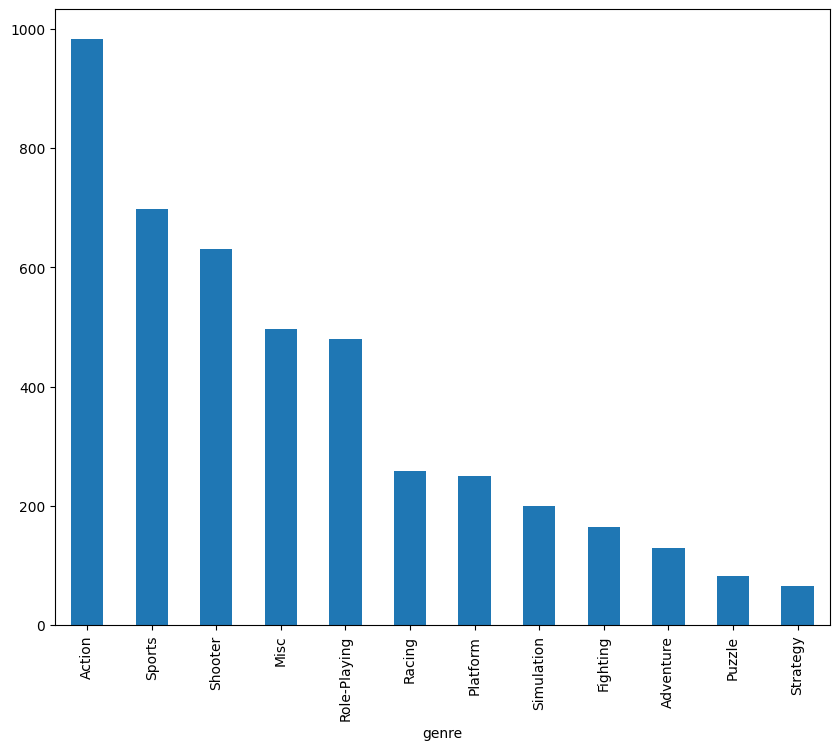

In [41]:
df2.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,8))

В пятёрку самых продаваемых жанров входят:
<ol>
<li>Action</li>
<li>Sports</li>
<li>Shooter</li>
<li>Misc</li>
<li>Role_Playing</li>
</ol><br>
При запукпе ассортимента стоит делать упор на эти жанры. Но для расстановки преоритетов, изучим также валатильность продаж этих жанров:

In [42]:
profitable_genres = list(df2.groupby('genre', as_index=False)['total_sales'].sum().sort_values(by='total_sales', ascending=False).head()['genre'])

<AxesSubplot: >

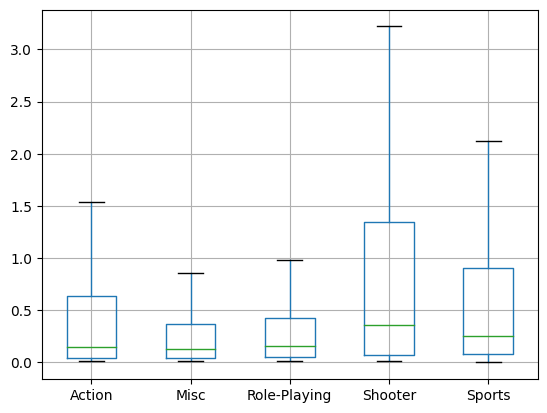

In [43]:
df2.query("genre in @profitable_genres").pivot_table(index='name', columns='genre', values='total_sales', aggfunc=sum).boxplot(showfliers = False)

Сильно выбиваются по продажам от дельные игры в жанре Shooter. Помсмотрим, что это за игры:

In [44]:
df2[df2['genre'] == 'Shooter'].groupby('name')['total_sales'].sum().sort_values(ascending=False)

name
Call of Duty: Modern Warfare 3                                     27.31
Call of Duty: Black Ops                                            26.12
Call of Duty: Black Ops II                                         25.64
Call of Duty: Ghosts                                               24.31
Call of Duty: Black Ops 3                                          22.18
                                                                   ...  
Tom Clancy's  Ghost Recon Advanced Warfighter (weekly JP sales)     0.01
DoDonPachi Saidaioujou                                              0.01
DoDonPachi Daifukkatsu: Black Label                                 0.01
F.E.A.R. Perseus Mandate                                            0.01
Caladrius                                                           0.01
Name: total_sales, Length: 406, dtype: float64

<AxesSubplot: xlabel='name'>

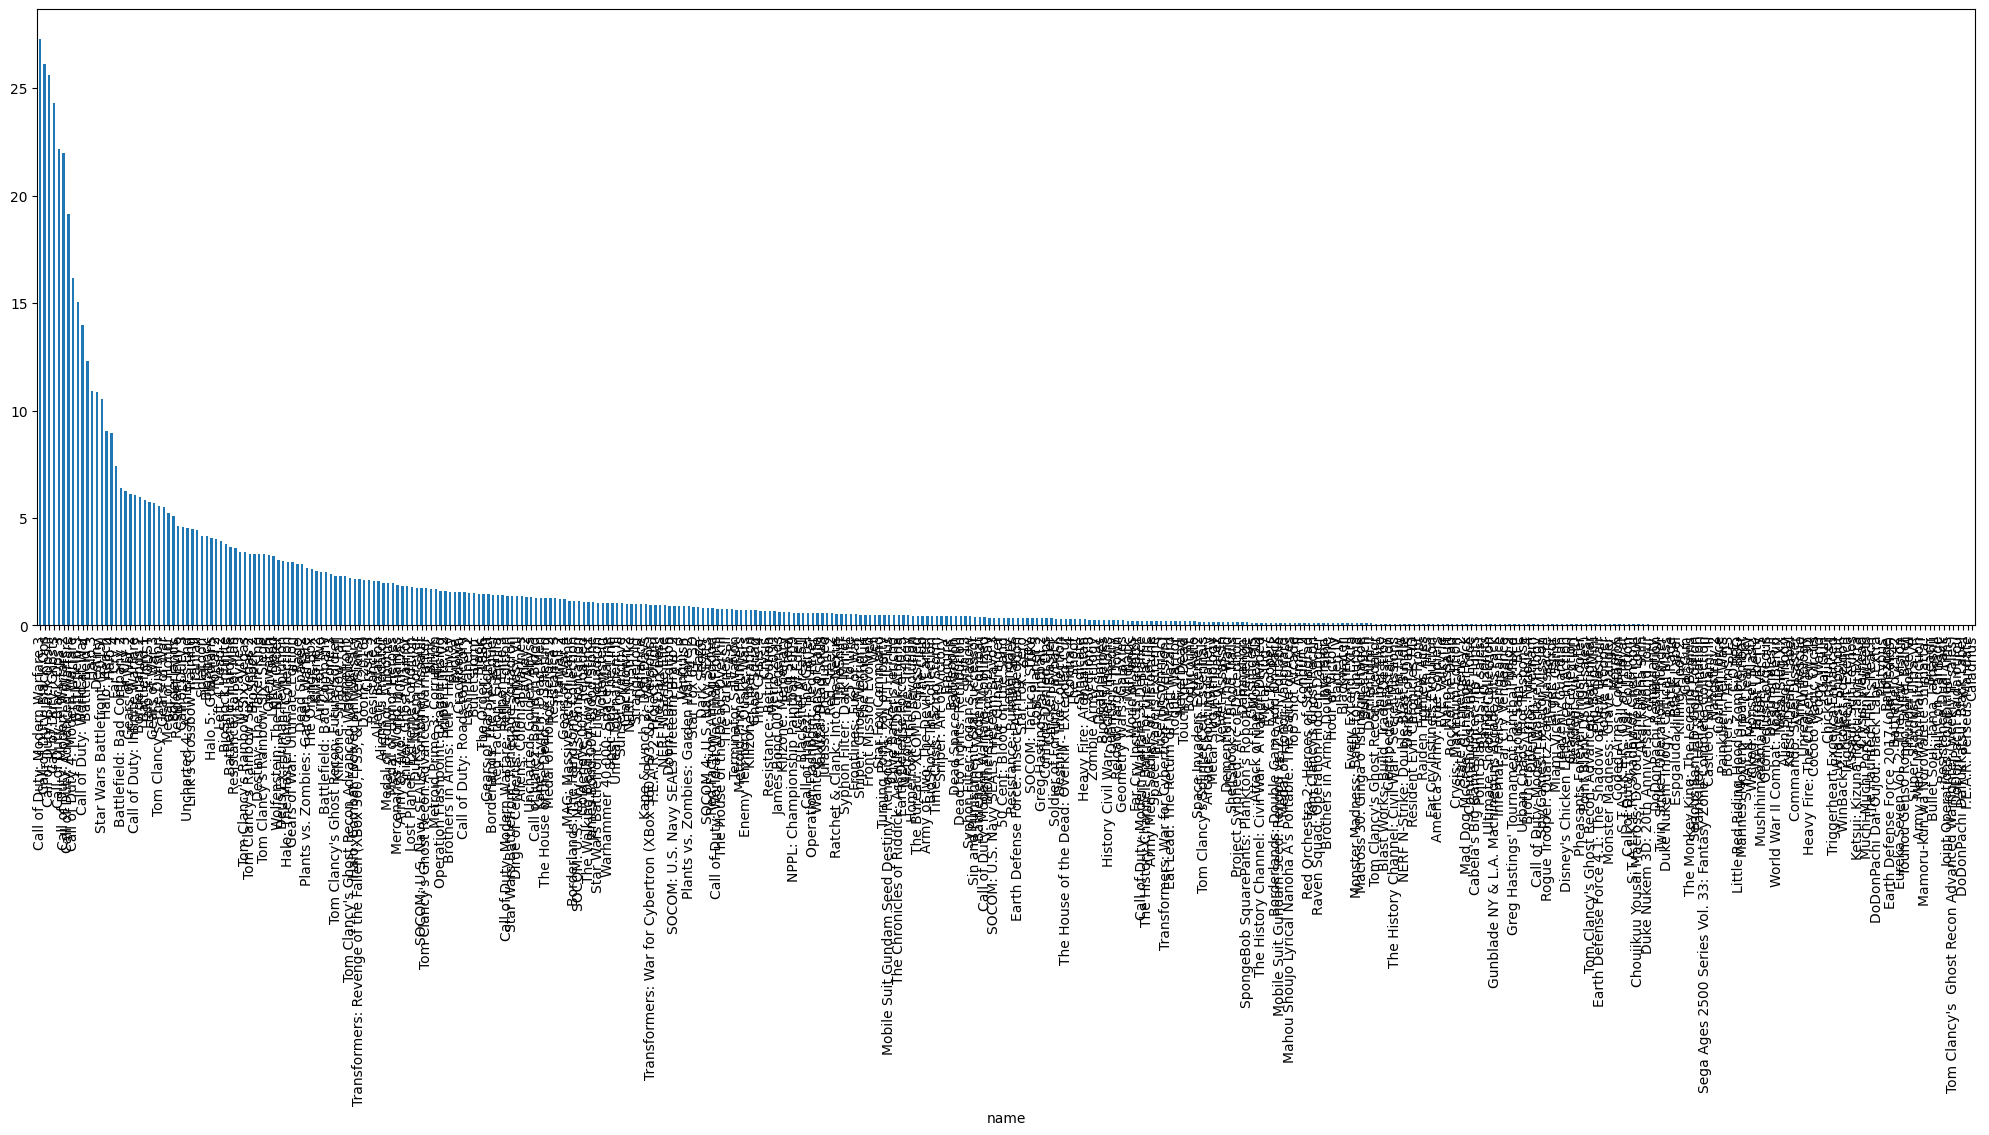

In [63]:
df2[df2['genre'] == 'Shooter'].groupby('name')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(25,8))

В жанре "Шутанов" "тащит" серия Call of Duty. Учтём это при закупе.

<h2>Составим портрет пользователя каждого региона

<h3>Изучим самые популярные платформы (топ-5):

In [46]:
profitable_platform = df2.groupby('platform_general').agg({'na_sales':'sum',
                                     'eu_sales':'sum',
                                     'jp_sales':'sum',
                                     'total_sales':'sum'}).sort_values('total_sales', ascending=False).head()

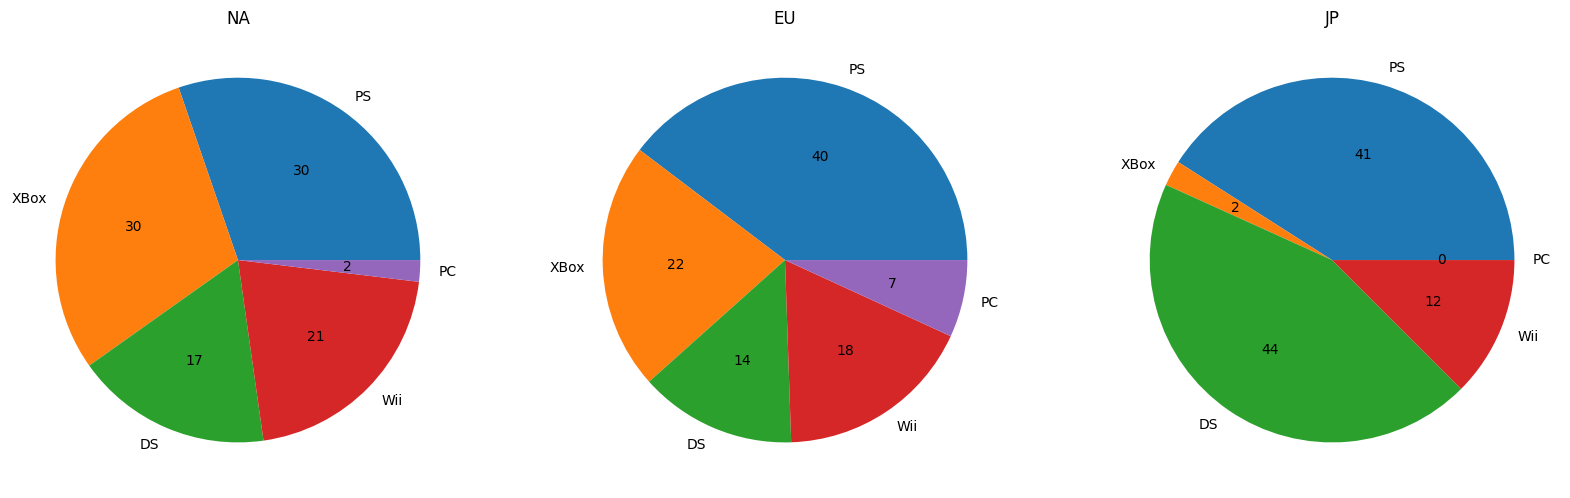

In [47]:
fig = plt.Figure()

fig = plt.Figure(figsize=(20, 40))
na = fig.add_subplot(1, 3, 1)
eu = fig.add_subplot(1, 3, 2)
jp = fig.add_subplot(1, 3, 3)

_= na.pie(x=profitable_platform['na_sales'], autopct='%.0f', labels=profitable_platform.index)
_= eu.pie(x=profitable_platform['eu_sales'], autopct='%.0f', labels=profitable_platform.index)
_= jp.pie(x=profitable_platform['jp_sales'], autopct='%.0f', labels=profitable_platform.index)

na.set_title('NA')
eu.set_title('EU')
jp.set_title('JP')
fig

Структура продаж относительно платформы в Европе и Северной Америке очень схожи, за исключение того, что в Европе любят игры на ПК больше чем в других регионах, хотя доля продаж ПК всё еще не велика.<br>
 В Японии же доминируют местные производители Nintendo (Wii и DS) и Sony (PS), XBox занимает всего 2% рынка. На ПК японцы совсем не играют

<h3>Изучим самые популярные жанры (топ-5):

In [48]:
profitable_genre = df2.groupby('genre').agg({'na_sales':'sum',
                                                           'eu_sales':'sum',
                                                           'jp_sales':'sum',
                                                           'total_sales':'sum'}).sort_values('total_sales', ascending=False).head()

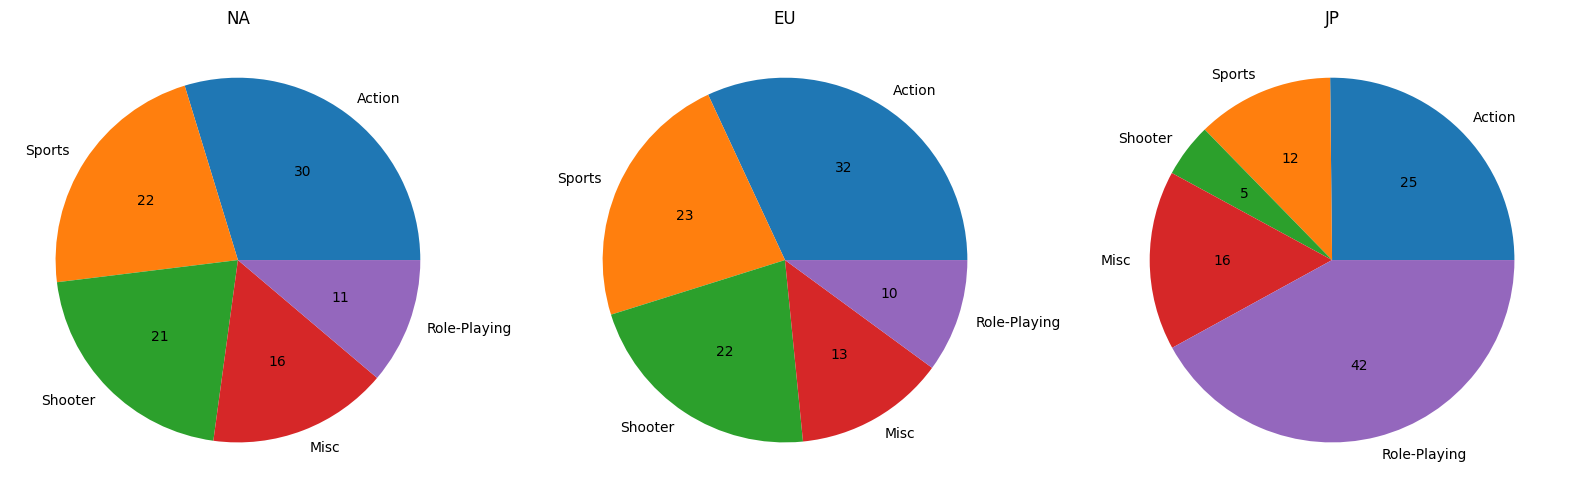

In [49]:
fig = plt.Figure()

fig = plt.Figure(figsize=(20, 40))
na = fig.add_subplot(1, 3, 1)
eu = fig.add_subplot(1, 3, 2)
jp = fig.add_subplot(1, 3, 3)

_= na.pie(x=profitable_genre['na_sales'], autopct='%.0f', labels=profitable_genre.index)
_= eu.pie(x=profitable_genre['eu_sales'], autopct='%.0f', labels=profitable_genre.index)
_= jp.pie(x=profitable_genre['jp_sales'], autopct='%.0f', labels=profitable_genre.index)

na.set_title('NA')
eu.set_title('EU')
jp.set_title('JP')
fig

Так же картин. Европа и Северная Америка мало отличаются друг от друга – самые популярные жанры:
<ol>
    <li>Action</li>
    <li>Sports</li>
    <li>Shooter</li>
    <li>Misc</li>
    <li>Role-Plaing</li>
</ol>
В Японии же доминируют "ролевухи" и сильно просидают "шутаны"

<h3> Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [50]:
genre_counts = df2.groupby('rating').agg({'na_sales':'sum',
                           'eu_sales':'sum',
                           'jp_sales':'sum',})

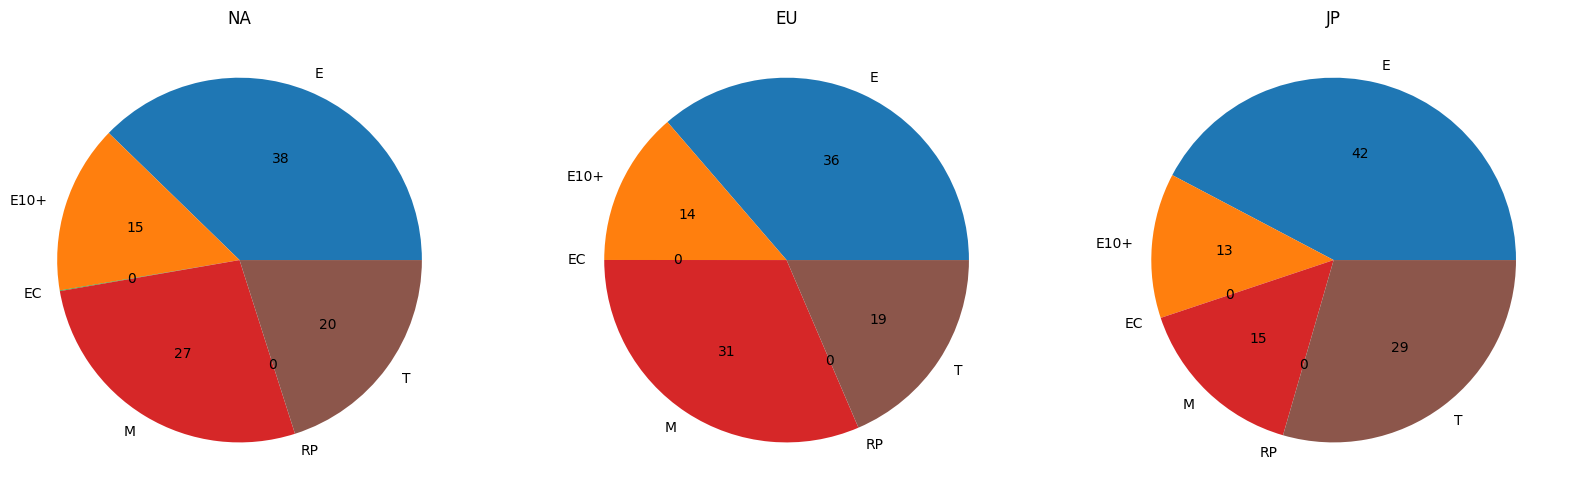

In [51]:
fig = plt.Figure()

fig = plt.Figure(figsize=(20, 40))
na = fig.add_subplot(1, 3, 1)
eu = fig.add_subplot(1, 3, 2)
jp = fig.add_subplot(1, 3, 3)

_= na.pie(x=genre_counts['na_sales'], autopct='%.0f', labels=genre_counts.index)
_= eu.pie(x=genre_counts['eu_sales'], autopct='%.0f', labels=genre_counts.index)
_= jp.pie(x=genre_counts['jp_sales'], autopct='%.0f', labels=genre_counts.index)

na.set_title('NA')
eu.set_title('EU')
jp.set_title('JP')
fig

Различия продаж всех трех регионов не значительны. Разве что в Японии больше доля продаж игр с рейтингом T, в основном за счет снижения доли игр в ретингом M

<h2>Проверим некоторые гипотезы

<h3>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

h0 – Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (P1 = P2)<br>
h1 – Средние пользовательские рейтинги платформ Xbox One и PC отличаются (P1 <> P2)

In [52]:
for col in df2.columns:
    print(col)

name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating
total_sales
platform_general


In [53]:
df2['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PS2', 'PSP', 'PSV', 'GBA', 'GC', 'XB', 'DC'], dtype=object)

In [69]:
print('Размер первой выборки:',len(df2[df2['platform'] == 'XOne']['user_score'].dropna()))
print('Размер второй выборки:',len(df2[df2['platform'] == 'PC']['user_score'].dropna()))

Размер первой выборки: 182
Размер второй выборки: 616


In [71]:
alpha = .01
# Т.к. объём выборки можно считать большим, уместно применить уровень значимости в  1 %
# Подробнее об это можно узнать тут: https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/

<AxesSubplot: >

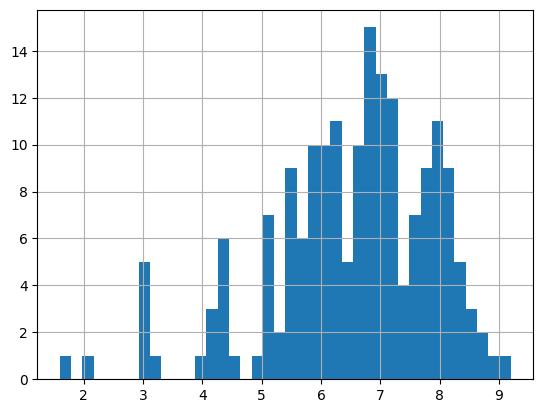

In [55]:
df2[df2['platform'] == 'XOne']['user_score'].dropna().hist(bins=40)

<AxesSubplot: >

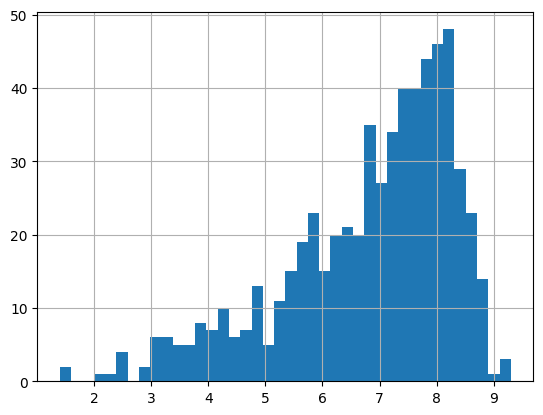

In [56]:
df2[df2['platform'] == 'PC']['user_score'].dropna().hist(bins=40)

Обе выборки ГС распределены нормально, но вторая имеет выраженное смещение влево.<br>
Т.к. обе выборки достаточно велики (количество значение > 30), присвоим параметру `equal_var` значение `True`

In [57]:
results = st.ttest_ind(
  df2[df2['platform'] == 'XOne']['user_score'].dropna(),
  df2[df2['platform'] == 'PC']['user_score'].dropna(), 
  equal_var = True
  )

In [58]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.013520557331277105
Не получилось отвергнуть нулевую гипотезу


<h3>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.;

h0 – Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые (P1 = P2)<br>
h1 – Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются (P1 <> P2)

<AxesSubplot: >

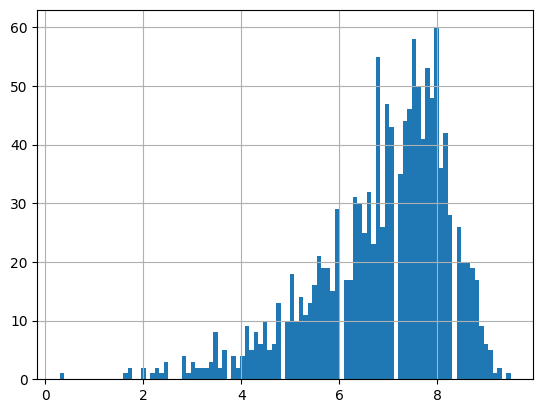

In [59]:
df2[df2['genre'] == 'Action']['user_score'].dropna().hist(bins=100)

<AxesSubplot: >

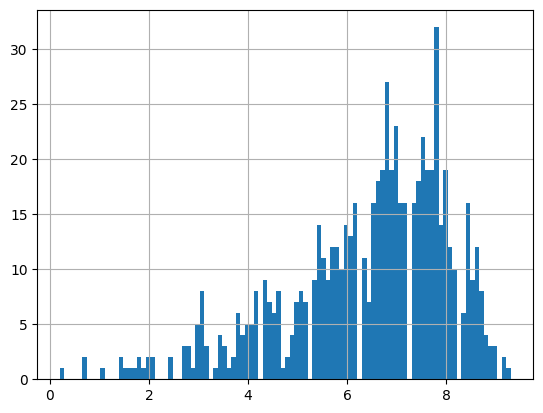

In [60]:
df2[df2['genre'] == 'Sports']['user_score'].dropna().hist(bins=100)

Обе выборки ГС распределены нормально и имеют выраженное смещение влево.<br>
Т.к. обе выборки достаточно велики (количество значение > 30), присвоим параметру `equal_var` значение `True`

In [70]:
print('Размер первой выборки:',len( df2[df2['genre'] == 'Action']['user_score'].dropna()))
print('Размер второй выборки:',len(df2[df2['platform'] == 'PC']['user_score'].dropna()))

Размер первой выборки: 1325
Размер второй выборки: 616


In [72]:
alpha = .01
# Т.к. объём выборки можно считать большим, уместно применить уровень значимости в  1 %
# Подробнее об это можно узнать тут: https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/

In [61]:
results = st.ttest_ind(
  df2[df2['genre'] == 'Action']['user_score'].dropna(),
  df2[df2['genre'] == 'Sports']['user_score'].dropna(), 
  equal_var = True
  )

In [62]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.095316868664557e-11
Отвергаем нулевую гипотезу


<h2><strong>Общий вывод</strong></h2>
<p>В настощий момент рынок видеоигр находится в стагнации. Это му периоду предшествовал продолжительный рост до 2008 - 2009 годов.
<p>На рынке присутсвуют три лидера: PlayStation, Xbox и Nintendo. Они меняют покаления флагманских платфор каждые 5 лет, но игры продаются на протяжении 10 лет. Пик продаж приходиться на второй - третий год продаж очередного поколения платформы.
<p>Оценки играков и профессиональных критиков могут несовпадать, на продажи влияют в основном оценки критиков.
<p>В пятёрку самых продаваемых жанров входят:
<ol>
<li>Action</li>
<li>Sports</li>
<li>Shooter</li>
<li>Misc</li>
<li>Role_Playing</li>
</ol><br>
При оценке игры с точки зрения жанра стоит учитывать и валатильность, т.к. в некоторых жанрах могу встречаться игры–звезды, которые сильно "тащут" продажи. Наример; серия Call of Duty в жанре шутеров.
<br>Структура рынка Северной Америки и Евпропы схожи, а Япония существенно отличаеться. Для прогнозироания продаж Америку и Европу можно оъединить.



<h2>